# Conway game of life

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import os
import matplotlib
from IPython.display import Image

## This is helper function that I use to transform text file with initial configuration.
### At first my program was working with text files like below (left) and then i checked how they look on official conway website (below right), so thats why i wrote function that transforms them so they work with my code.

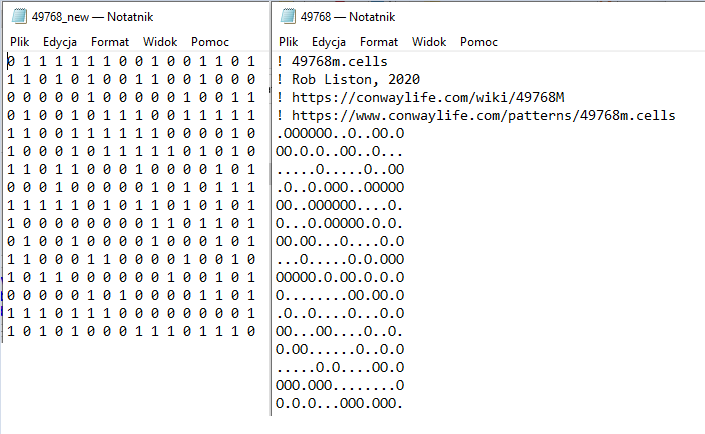

### It also sometimes fixes dimensions so we always get LxL lattice, thanks that output looks better.

In [15]:
def transform_file(file_path):
    output_file_path = file_path.replace(".txt", "_new.txt")
    max_length = 0
    lines = []

    with open(file_path, "r") as input_file, open(output_file_path, "w") as output_file:
        for line in input_file:
            if line.startswith("!"):
                continue
            processed_line = line.replace("O", "1").replace(".", "0")
            processed_line = " ".join(processed_line)
            output_file.write(processed_line)

    with open(output_file_path, "r") as file:
        for line in file:
            elements = line.strip().split()
            lines.append(elements)

    for elements in lines:
        current_length = len(elements)
        max_length = max(max_length, current_length)

    for i in range(len(lines)):
        current_length = len(lines[i])
        if current_length < max_length:
            zeros_to_add = max_length - current_length
            lines[i].extend(['0'] * zeros_to_add)
    
    if len(lines) < max_length:
        for i in range(max_length-len(lines)):
            lines.append(["0"]*max_length)

    with open(output_file_path, "w") as output_file:
        for elements in lines:
            line = " ".join(elements)
            output_file.write(line + "\n")

In [26]:
import matplotlib.pyplot as plt
import imageio
import glob

def giff(folder,gifname):
    """creates gif from all pngs in given directory"""
    frames = []
    for t in range(len(glob.glob(folder + '/*.png'))):
        image = imageio.v2.imread(folder+"/{}.png".format(t))
        frames.append(image)
    imageio.mimsave('./{}.gif'.format(gifname),
            frames,          
            duration = 5,
            loop = 0) 

## Quick explanation how code works:
    1. create folder that will be used to store frames (pictures of plots) - if it already exist it only empties it
    2. check if input is matrix or file, if its file it transforms it into right format and reads it
    3. then we start iteration, to check conditions i calculate matrix with sum of neighbours for every point and based on it I change the next state:

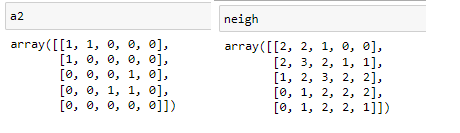

    4. when iteration is done i use giff() func. to create gif
    5. then i delete used frames and folder so that it doesnt take up disk space
    6. function should return gif

In [13]:
def conway(a2,gifname,N):
    """
        a2 - either matrix or path to the configuration file
        gifname - function produces gif with name passed as this argument
        N - num of iterations
    """
    if not os.path.exists("CONWAY/"):
        os.makedirs("CONWAY/") #making folder for frames
    files = glob.glob('CONWAY/*')
    for f in files:
        os.remove(f) #clearing folder of old frames
    plt.ioff() #so it doesnt plot every frame below
    k = 0
    if type(a2) is str: 
        if os.path.isfile(a2):
            transform_file(a2)
            a_name = a2.replace(".txt", "_new.txt")
            a2 = np.loadtxt(a_name)
            #os.remove(a_name)
        else:
            return("no file named {}".format(a2))
    L1,L2 = a2.shape
    plt.figure(figsize=(8,8))
    plt.gca().invert_yaxis()
    plt.pcolormesh(a2,cmap="Greys",edgecolors="grey",linewidth=2)
    plt.savefig('CONWAY/{}'.format(k))
    plt.close()
    #plt.show()
    for _ in range(N):
        k += 1
        a_new = a2
        neigh = convolve2d(a2,np.ones((3,3),dtype=int),'same') - a2
        for i in range(L1):
            for j in range(L2):
                if a2[i,j] == 0:
                    if neigh[i,j] ==3:
                        a_new[i,j] = 1 
                if a2[i,j] == 1:
                    if neigh[i,j] in [0,1,4,5,6,7,8]:
                        a_new[i,j] = 0
        a2 = a_new
        plt.figure(figsize=(8,8))
        plt.gca().invert_yaxis()
        plt.pcolormesh(a2,cmap="Greys",edgecolors="grey",linewidth=2)
        plt.savefig('CONWAY/{}'.format(k))
        plt.close()
    giff("CONWAY",gifname)
    files = glob.glob('CONWAY/*')
    for f in files:
        os.remove(f) 
    os.rmdir("CONWAY/")
        #plt.show()
    return Image(filename="{}.gif".format(gifname))

In [23]:
a2 = np.array([[1,1,0,0,0],[1,0,0,0,0],[0,0,0,1,0],[0,0,1,1,0],[0,0,0,0,0]])

In [24]:
a2

array([[1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0]])

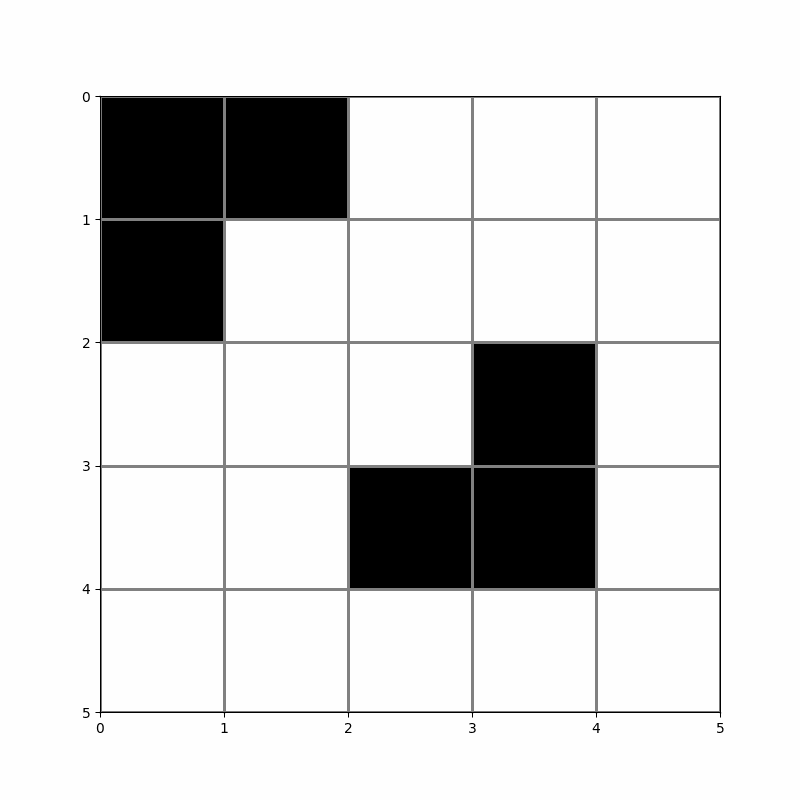

In [25]:
conway(a2,"test",10)

In [ ]:
conway("patterns/pulsar.txt","patterns/pulsar",100)

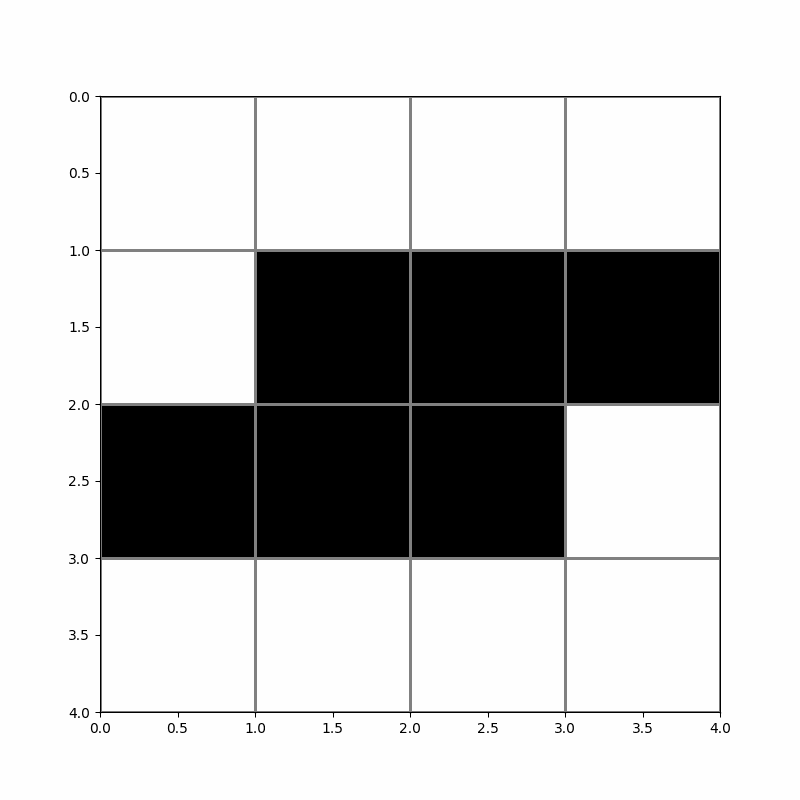

In [17]:
conway("patterns/toad.txt","patterns/toad",10)

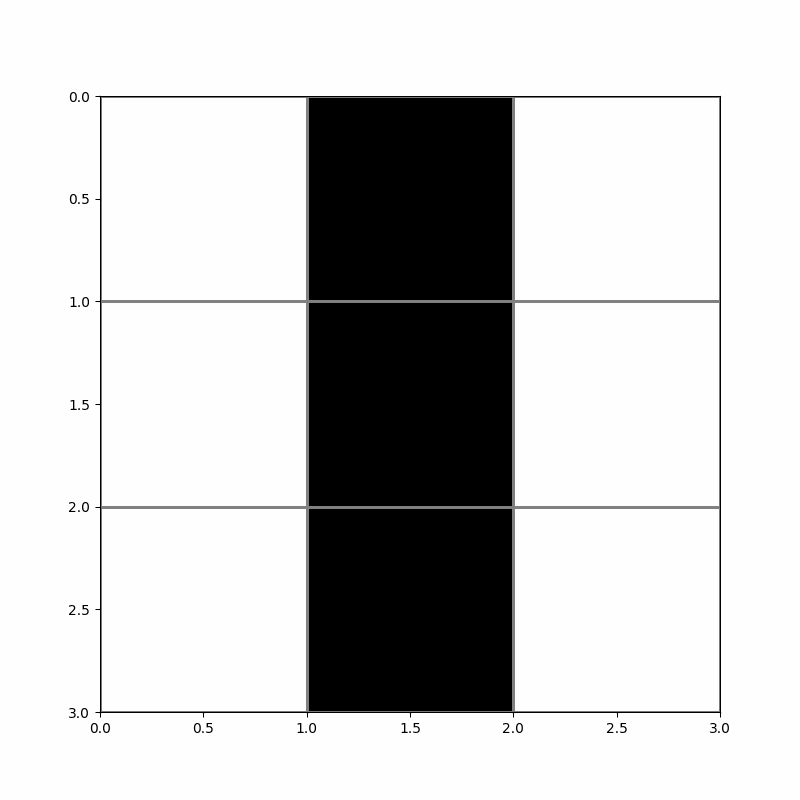

In [18]:
conway("patterns/blinker.txt","patterns/blinker",10)

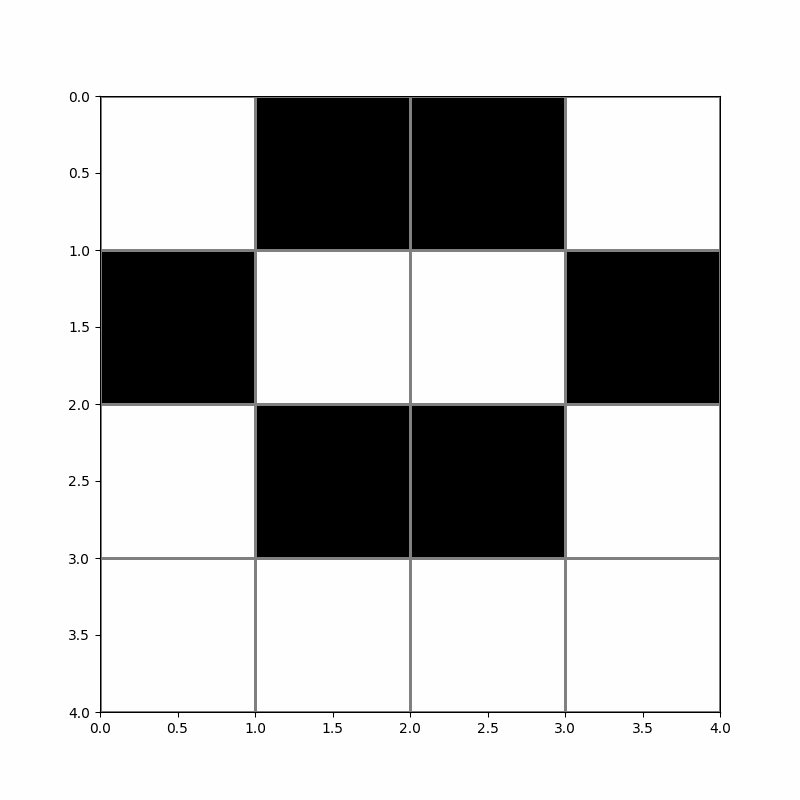

In [19]:
conway("patterns/beehive.txt","patterns/beehive",10)

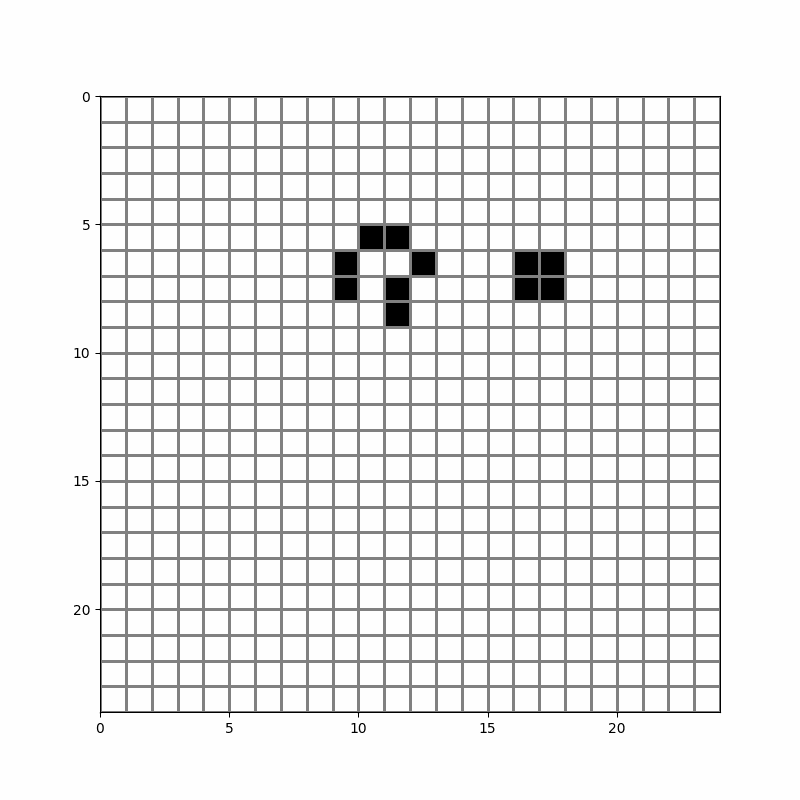

In [20]:
conway("patterns/beehive2.txt","patterns/beehive2",100)

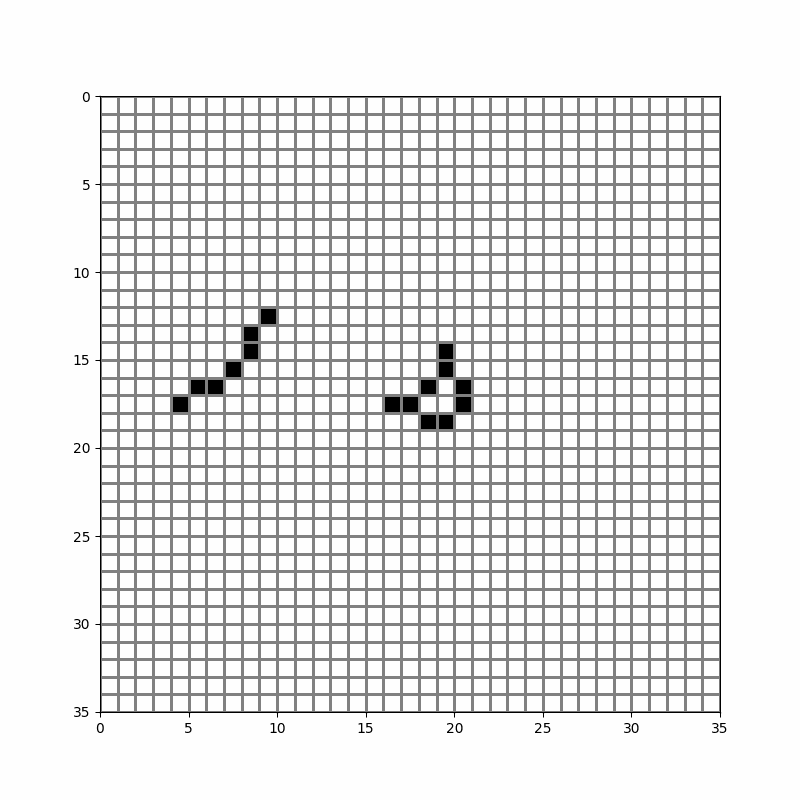

In [21]:
conway("patterns/pond.txt","patterns/pond",100)

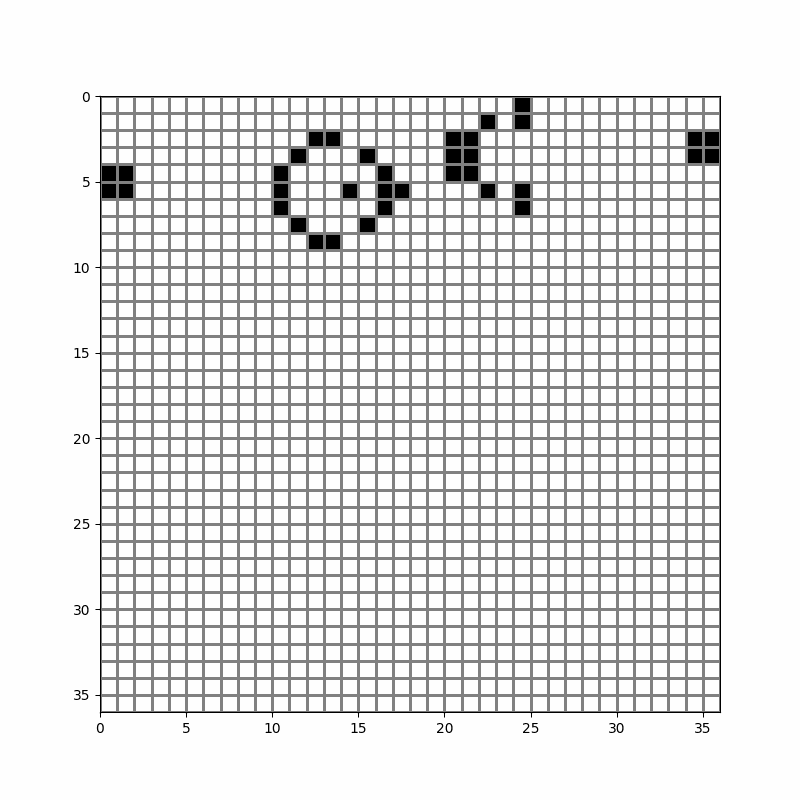

In [22]:
conway("patterns/gosperglidergun.txt","patterns/gosperglidergun",100)